In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [35]:
# data from: https://nssdc.gsfc.nasa.gov/planetary/factsheet/

                  # Murcury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune, Pluto
orbital_periods  = np.array([88.0, 224.7, 365.2, 687.0, 4331, 10747, 30589,    59800,  90560]) # units days
orbital_radiuses = np.array([57.9, 108.2, 149.6, 227.9, 778.6, 1433.5, 2872.5, 4495.1, 5906.4]) * 1e9 # units 10^6 km -> meters.

log_orbital_periods = np.log10(orbital_periods)
log_orbital_radiuses = np.log10(orbital_radiuses)

In [36]:
slope, intercept, r_value, p_value, std_err = stats.linregress(log_orbital_radiuses, log_orbital_periods)
predict_period = lambda radius: intercept + slope * radius

print("Slope: %.6f"%slope)
print("Intercept: %.6f"%intercept)
print("R: %.6f (R^2: %.6f), P_val: %.6E"%( r_value, r_value**2, p_value))

Slope: 1.498800
Intercept: -14.186579
R: 1.000000 (R^2: 0.999999), P_val: 2.020450E-22


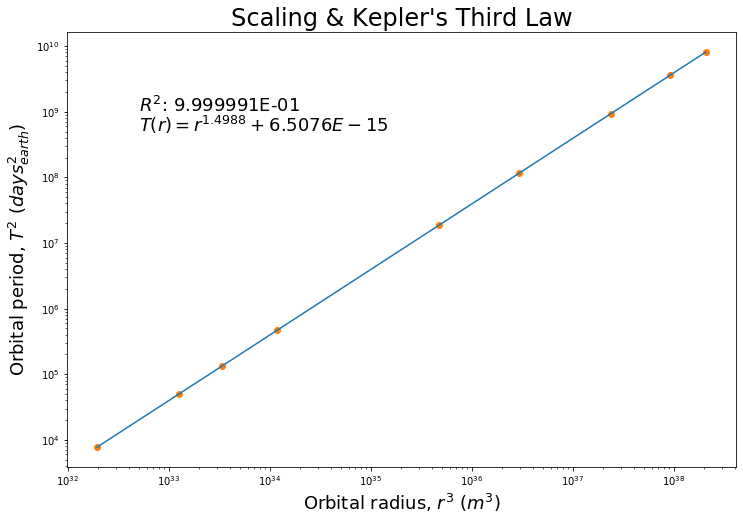

In [37]:
fig, ax = plt.subplots(1, figsize=(12,8))
ax.scatter( np.power(orbital_radiuses, 3), np.power(orbital_periods, 2), c="C1")
ax.plot(np.power(np.power(10, log_orbital_radiuses), 3), np.power(np.power(10, predict_period(log_orbital_radiuses)), 2), c="C0")
ax.set_title("Scaling & Kepler's Third Law", fontsize=24)
ax.set_xlabel(r"Orbital radius, $r^3$ ($m^3$)", fontsize=18)
ax.set_ylabel(r"Orbital period, $T^2$ ($days_{earth}^2$)", fontsize=18)
ax.set_yscale("log")
ax.set_xscale("log")
ax.text(5e32, 1e9, r"$R^2$: %.6E"%(r_value**2), fontsize=18)
ax.text(5e32, 5e8, r"$T(r) = r^{%.4f} + %.4E$"%(slope, np.power(10, intercept)), fontsize=18)
plt.savefig("part7d.pdf", bbox_inches='tight', pad_inches=0)
